In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
df = pd.read_csv(r"C:\Users\anrad\OneDrive\Documents\ML AI\Module 11\vehicles.csv")

In [26]:
#Checking and understanding the dataset

df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
id              426880 non-null int64
region          426880 non-null object
price           426880 non-null int64
year            425675 non-null float64
manufacturer    409234 non-null object
model           421603 non-null object
condition       252776 non-null object
cylinders       249202 non-null object
fuel            423867 non-null object
odometer        422480 non-null float64
title_status    418638 non-null object
transmission    424324 non-null object
VIN             265838 non-null object
drive           296313 non-null object
size            120519 non-null object
type            334022 non-null object
paint_color     296677 non-null object
state           426880 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 58.6+ MB


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [27]:
# Keep core variables
cols_to_keep = [
    "price", "year", "odometer", "manufacturer", "model", "condition",
    "cylinders", "fuel", "title_status", "transmission", "drive",
    "size", "type", "paint_color", "state"
]

df = df[cols_to_keep].copy()
df.head()

,price,year,odometer,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [28]:
#Check Missing Rate for Each Column

df.isna().mean().sort_values(ascending=False)

size            0.717675
cylinders       0.416225
condition       0.407852
drive           0.305863
paint_color     0.305011
type            0.217527
manufacturer    0.041337
title_status    0.019308
model           0.012362
odometer        0.010307
fuel            0.007058
transmission    0.005988
year            0.002823
state           0.000000
price           0.000000
dtype: float64

In [55]:
#Make a working copy & fix numeric types

df = df.copy()

for col in ["price", "year", "odometer"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows missing any core numeric fields
df = df.dropna(subset=["price", "year", "odometer"])

df[["price", "year", "odometer"]].describe()

,price,year,odometer
count,4.213440e+05,421344.000000,4.213440e+05
mean,7.598356e+04,2011.225244,9.822513e+04
std,1.226205e+07,9.463345,2.141207e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.975000e+03,2008.000000,3.795100e+04
50%,1.398800e+04,2013.000000,8.582750e+04
75%,2.649500e+04,2017.000000,1.338000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [56]:
#Remove Outliers

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = 0
upper = Q3 + 1.5 * IQR     # typical IQR upper bound

df = df[(df["price"] >= lower) & (df["price"] <= upper)].copy()

df["price"].describe()

count    413421.000000
mean      16390.343858
std       13107.716532
min           0.000000
25%        5900.000000
50%       13500.000000
75%       25590.000000
max       57112.000000
Name: price, dtype: float64

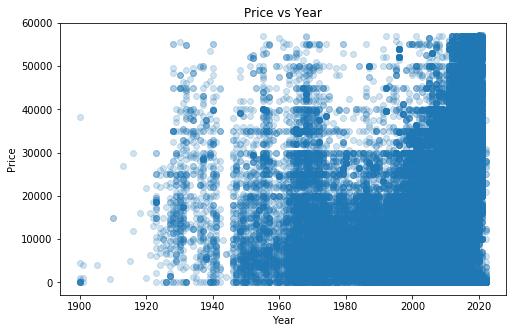

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["year"], df["price"], alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price vs Year")
plt.show()

In [70]:
df_modern = df[df["year"] >= 1990].copy()

In [71]:
CURRENT_YEAR = 2024
df_modern["age"] = CURRENT_YEAR - df_modern["year"]
df_modern["log_price"] = np.log1p(df_modern["price"])

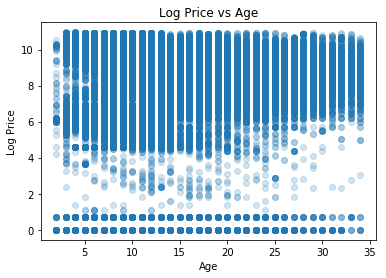

In [72]:
plt.scatter(df_modern["age"], df_modern["log_price"], alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Log Price")
plt.title("Log Price vs Age")
plt.show()

In [74]:
df_modern[['year','odometer','age','cylinders']].describe()

,year,odometer,age
count,401453.000000,4.014530e+05,401453.000000
mean,2012.366755,9.756140e+04,11.633245
std,5.756900,1.656298e+05,5.756900
min,1990.000000,0.000000e+00,2.000000
25%,2009.000000,3.969000e+04,7.000000
50%,2014.000000,8.815000e+04,10.000000
75%,2017.000000,1.354230e+05,15.000000
max,2022.000000,1.000000e+07,34.000000


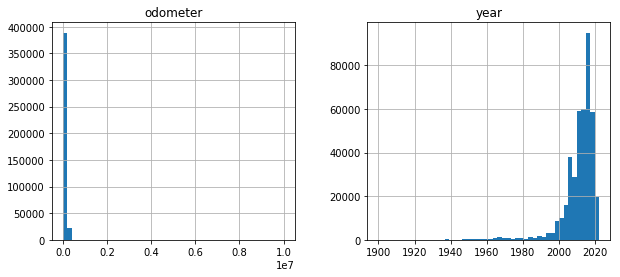

In [75]:
df[['year','odometer']].hist(figsize=(10,4), bins=50)
plt.show()

In [77]:
#Remove Odometer Outliers

Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1

lower_o = max(0, Q1 - 1.5 * IQR)
upper_o = Q3 + 1.5 * IQR

df_clean = df[(df['odometer'] >= lower_o) & (df['odometer'] <= upper_o)].copy()

df_clean['odometer'].describe()

count    409224.000000
mean      90832.989079
std       60333.130783
min           0.000000
25%       38995.000000
50%       86399.500000
75%      133000.000000
max      278044.000000
Name: odometer, dtype: float64

In [79]:
#Remove Old Vehicles

df_clean = df_modern[df_modern['age'] <= 30]

In [81]:
df_clean[['year','odometer','age','price']].describe()

,year,odometer,age,price
count,398930.000000,3.989300e+05,398930.000000,398930.000000
mean,2012.498300,9.712938e+04,11.501700,16527.846672
std,5.530827,1.611156e+05,5.530827,13152.989718
min,1994.000000,0.000000e+00,2.000000,0.000000
25%,2009.000000,3.964900e+04,7.000000,5933.000000
50%,2014.000000,8.800000e+04,10.000000,13900.000000
75%,2017.000000,1.350720e+05,15.000000,25990.000000
max,2022.000000,1.000000e+07,30.000000,57112.000000


In [83]:
# Start with df_clean
df_clean = df_clean.copy()   

# IQR-based bounds for odometer
Q1 = df_clean['odometer'].quantile(0.25)
Q3 = df_clean['odometer'].quantile(0.75)
IQR = Q3 - Q1

lower_o = max(0, Q1 - 1.5 * IQR)
upper_o = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['odometer'] >= lower_o) &
                    (df_clean['odometer'] <= upper_o)].copy()

df_clean['odometer'].describe()


count    395247.000000
mean      91322.788234
std       60267.817571
min           0.000000
25%       39219.000000
50%       87000.000000
75%      133643.000000
max      278104.000000
Name: odometer, dtype: float64

In [84]:
df_model = df_clean[[
    "price",
    "age", "odometer",
    "manufacturer", "condition", "cylinders",
    "fuel", "title_status", "transmission",
    "drive", "type", "state"
]].copy()

In [85]:
# Numeric & categorical splits
numeric_cols = ["age", "odometer"]
categorical_cols = [c for c in df_model.columns if c not in numeric_cols + ["price"]]

# Fill numeric
df_model[numeric_cols] = df_model[numeric_cols].fillna(df_model[numeric_cols].median())

# Fill categoricals
df_model[categorical_cols] = df_model[categorical_cols].fillna("missing")

In [86]:
df_model.isna().mean()

price           0.0
age             0.0
odometer        0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
state           0.0
dtype: float64

In [87]:
X = df_model.drop(columns=["price"])
y = df_model["price"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=True), categorical_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_tr = preprocess.fit_transform(X_train)
X_test_tr = preprocess.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_tr, y_train)

y_pred = ridge.predict(X_test_tr)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Ridge RMSE:", rmse)
print("Ridge R²:", r2)

Ridge RMSE: 11716.676054347048
Ridge R²: 0.20487193669270554
